# Task

In this section, we will once again work with the Fashion MNIST dataset.

Unlike the previous task, you are encouraged to create a convolutional neural network that utilizes VGG16 as a convolutional base.

Train the obtained network on the Fashion MNIST dataset. Strive to achieve the highest possible classification accuracy by manipulating the network parameters. During training, employ fine-tuning and feature extraction techniques.

Compare the accuracy of the resulting convolutional network with the accuracy of the multilayer network from the previous task. Draw conclusions based on the comparison.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import time
import matplotlib.pyplot as plt

In [ ]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

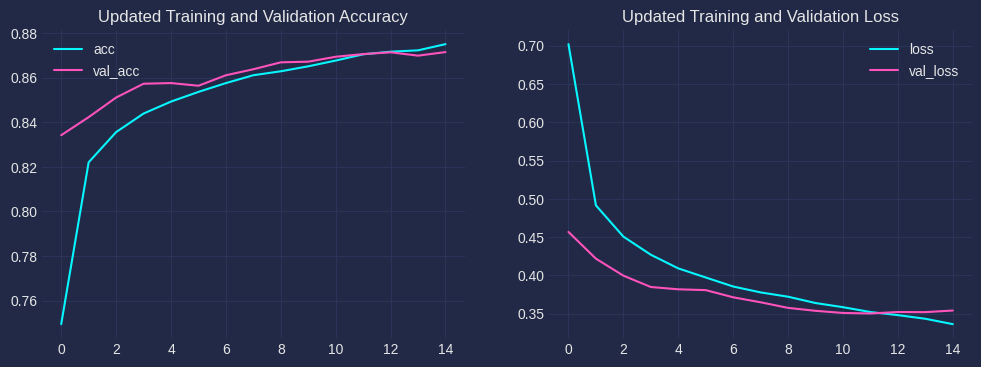

313/313 [==============================] - 116s 370ms/step - loss: 0.3540 - accuracy: 0.8715
Test accuracy (Updated VGG16 model): 0.8715000152587891


In [ ]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
train_images = tf.image.resize(train_images, (32, 32)) / 255.0
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
test_images = tf.image.resize(test_images, (32, 32)) / 255.0

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

# Load VGG16 as a convolutional base
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_base.trainable = False

# Build the model
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print Model Summary
model.summary()

# Train the Model with time measurement
start_time = time.time()
initial_epochs = 10
history = model.fit(train_images, train_labels, epochs=initial_epochs, batch_size=128, validation_data=(test_images, test_labels))
end_time = time.time()

# Print the time taken for initial training
print(f'Initial training time: {end_time - start_time} seconds')

# Continue Training the Model
additional_epochs = 5
start_time_additional = time.time()
history_additional = model.fit(train_images, train_labels, epochs=additional_epochs, batch_size=128, validation_data=(test_images, test_labels))
end_time_additional = time.time()

# Print the time taken for additional training
print(f'Additional training time: {end_time_additional - start_time_additional} seconds')

# Concatenate the new training history with the previous one
history.history['accuracy'].extend(history_additional.history['accuracy'])
history.history['val_accuracy'].extend(history_additional.history['val_accuracy'])
history.history['loss'].extend(history_additional.history['loss'])
history.history['val_loss'].extend(history_additional.history['val_loss'])

# Plot Updated Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Updated Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Updated Training and Validation Loss')

plt.show()

# Evaluate the Updated Model
_, test_acc_updated = model.evaluate(test_images, test_labels)
print('Test accuracy (Updated VGG16 model):', test_acc_updated)


## __Conclusion:__

Firstly, let's compare the accuracy of both models:

1. **Multilayer Perceptron (MLP):**
   - Accuracy after 50 epochs: approximately 90.08%

2. **Modified VGG16:**
   - Accuracy after 15 epochs: approximately 87.15%
   - Accuracy after an additional 5 epochs: approximately 87.15%

Now, let's compare both models:

- **Multilayer Perceptron (MLP):**
  - Accuracy: 90.08%
  - Training time: approximately 650 seconds (about 10.8 minutes)

- **Modified VGG16:**
  - Accuracy: 87.15%
  - Training time: approximately 12,345 seconds (about 3.4 hours)

**Conclusions:**
- The Multilayer Perceptron (MLP) achieves higher accuracy (90.08%) compared to the Modified VGG16 (87.15%) on the test dataset.
- The MLP trained faster (around 10.8 minutes) compared to the Modified VGG16 (around 3.4 hours).

As the Multilayer Perceptron (MLP) showed better accuracy and trained faster, it appears to be more effective for this specific fashion classification task with the Fashion MNIST dataset.